# Predicting stock prices using LSTM
## Introduction
This notebook demos a method of implementing an LSTM neural network to forecast future stock prices


## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
print('Libraries imported!')

Libraries imported!


## Import dataset

In [11]:
filepath = '../LSTM_stock_predictions/data/tesla.csv'
df = pd.read_csv(filepath)
df_copy = df.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## Visualise dataset

Below is a selection of visulisations of the dataset to get a better understanding of the data before trying to fit it to a model

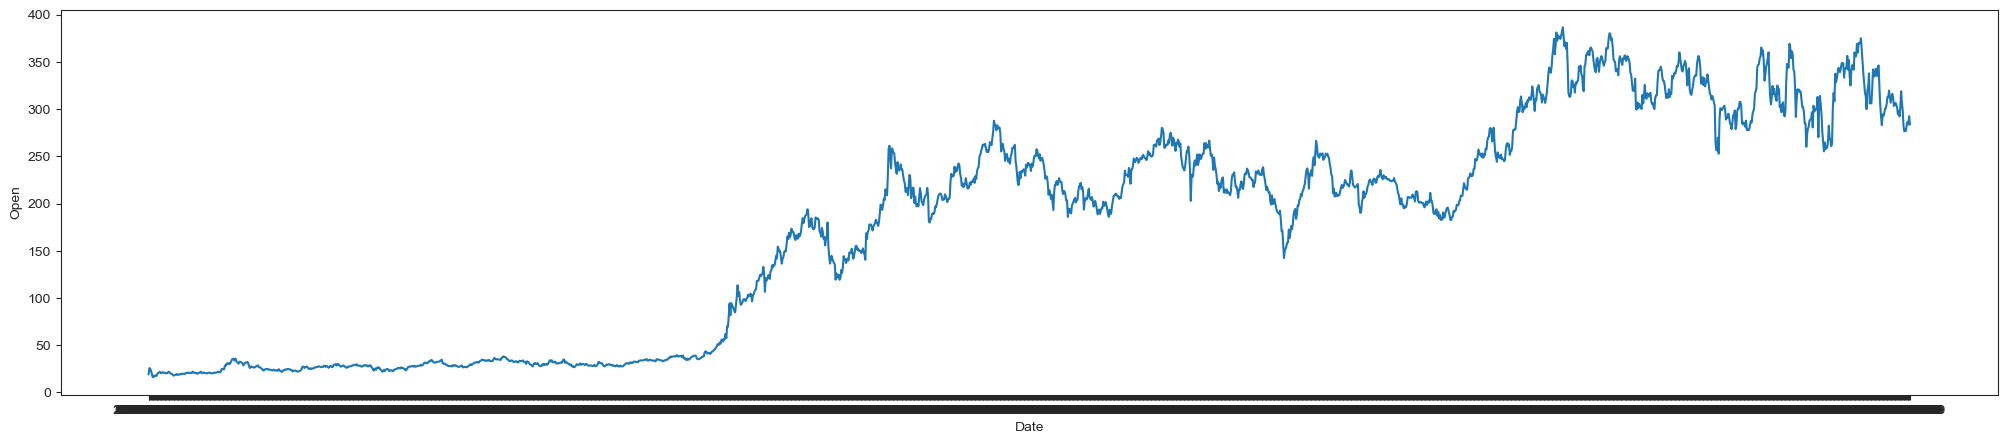

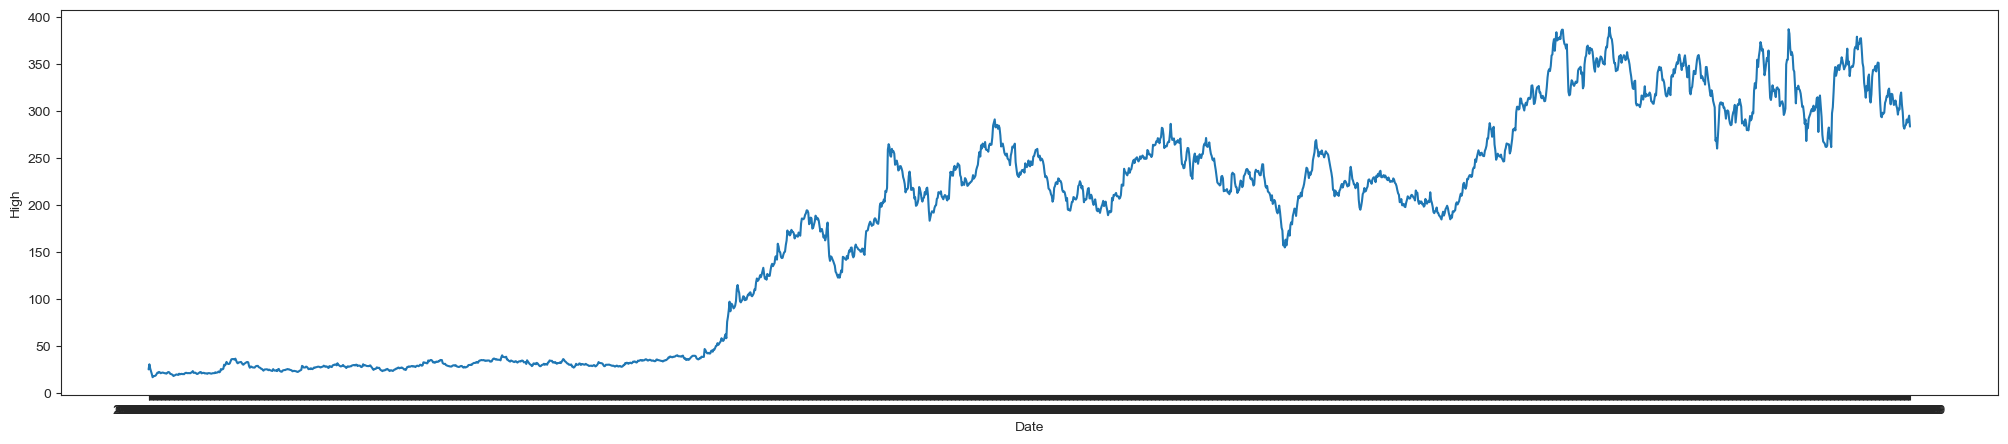

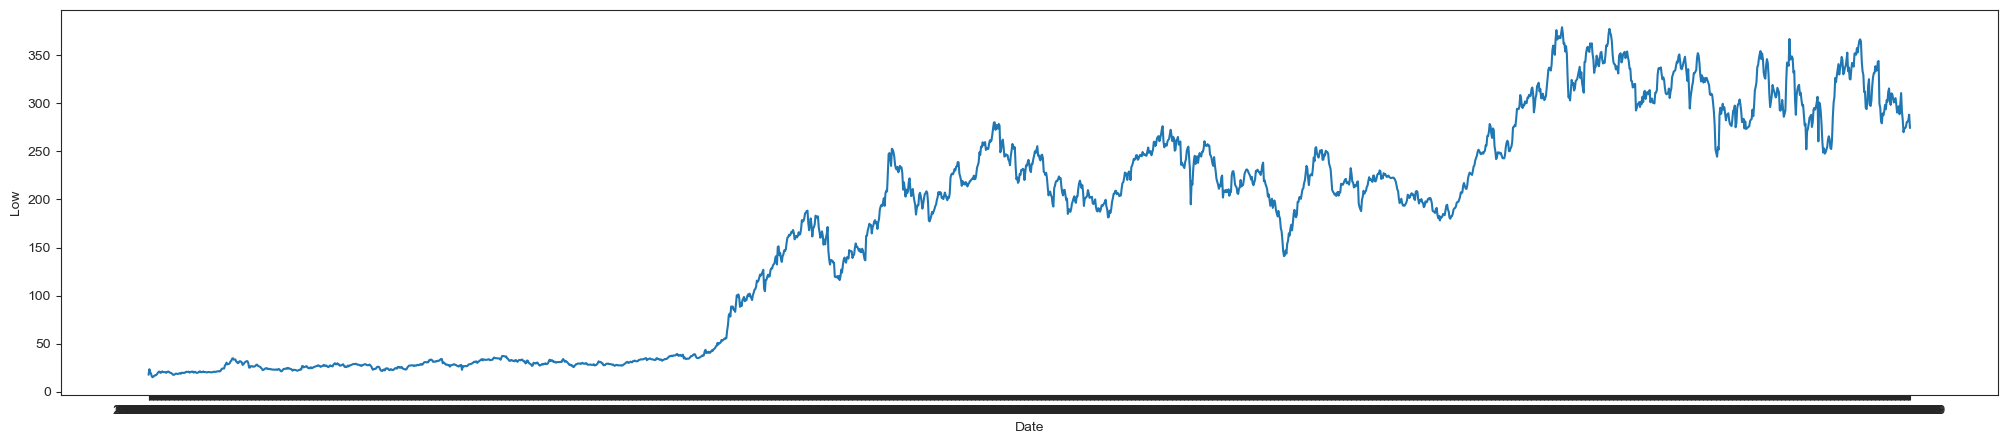

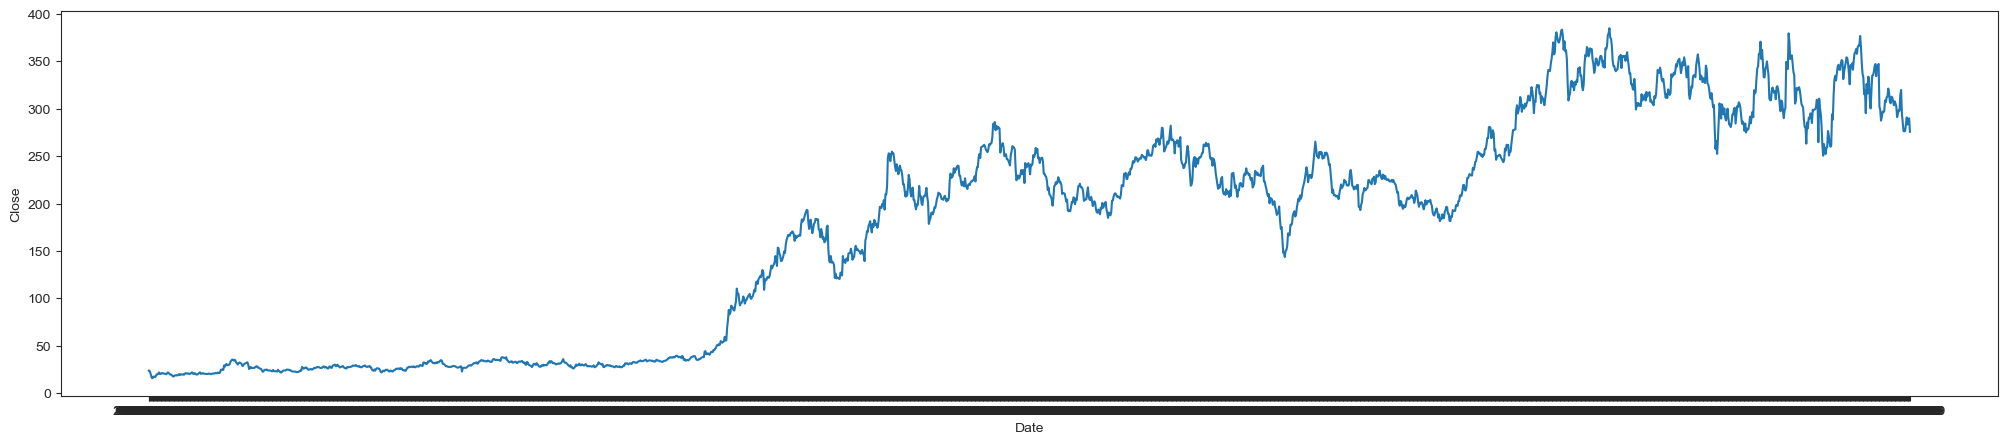

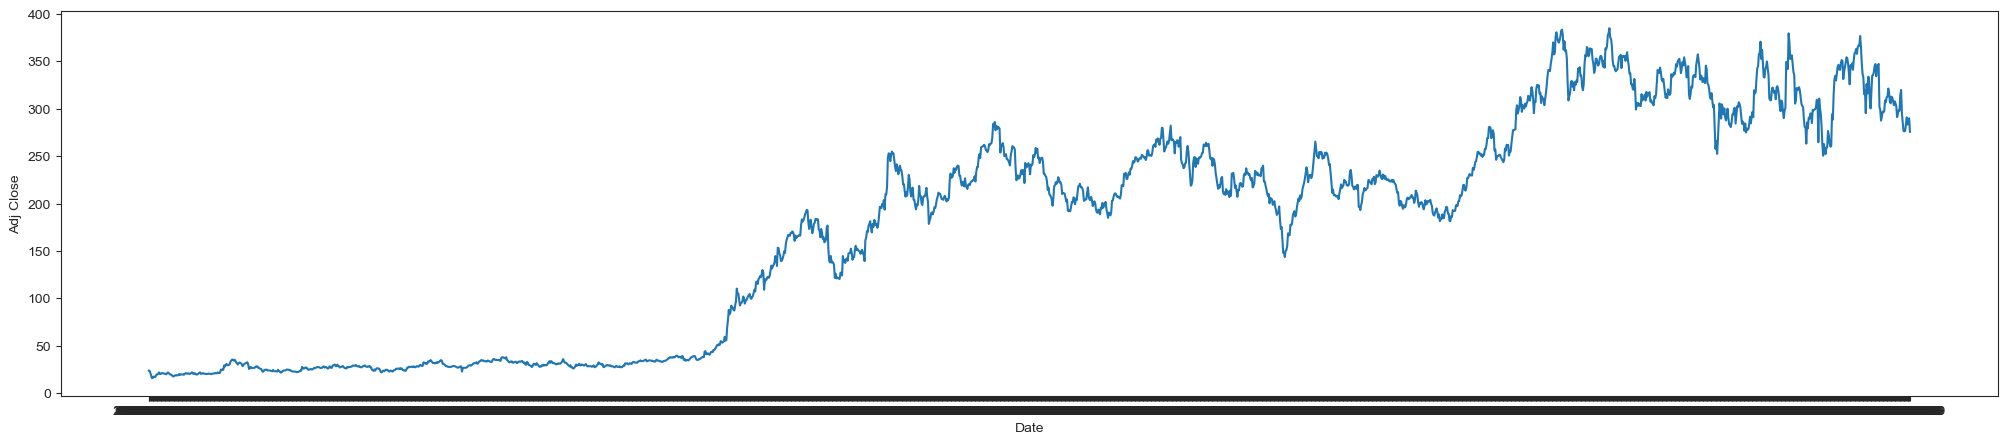

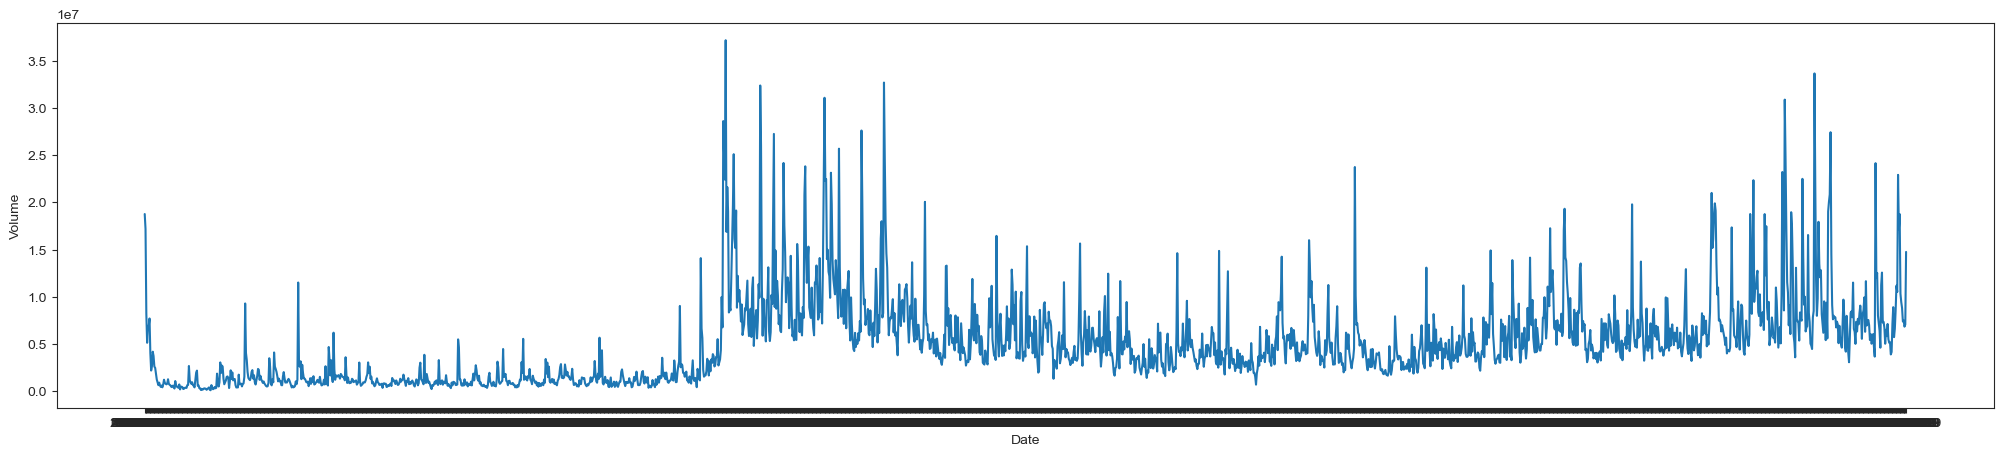

In [30]:
def plot_columns(df):
    # get column names
    column_name = df.columns
    # plot line of each variable vs date
    for name in column_name:
        if name != 'Date':
            sns.set_style("ticks")
            plt.figure(figsize=(25,5))
            sns.lineplot(x=df['Date'], y=df[name])
            plt.show()

plot_columns(df)

From the plots above it is clear that there is a distinct change in the data at the start of 2013 so for our modelling we will only consider data after 2013 as data before then does not follow the same type of pattern.

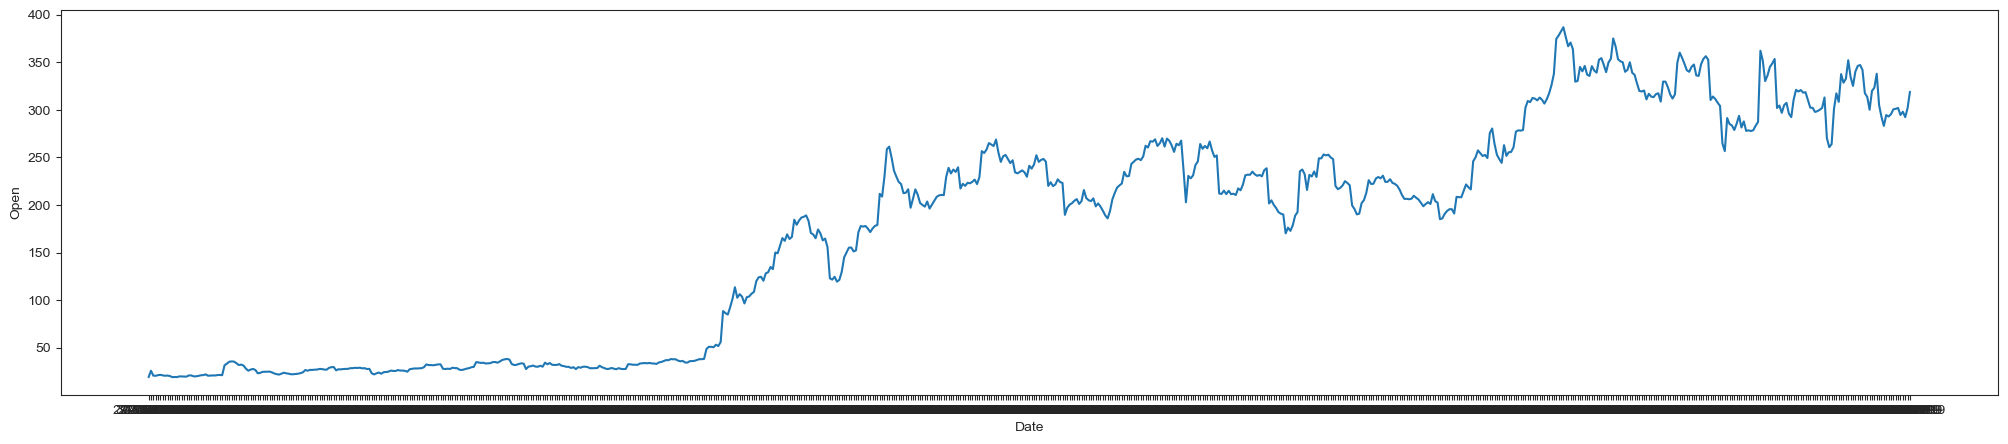

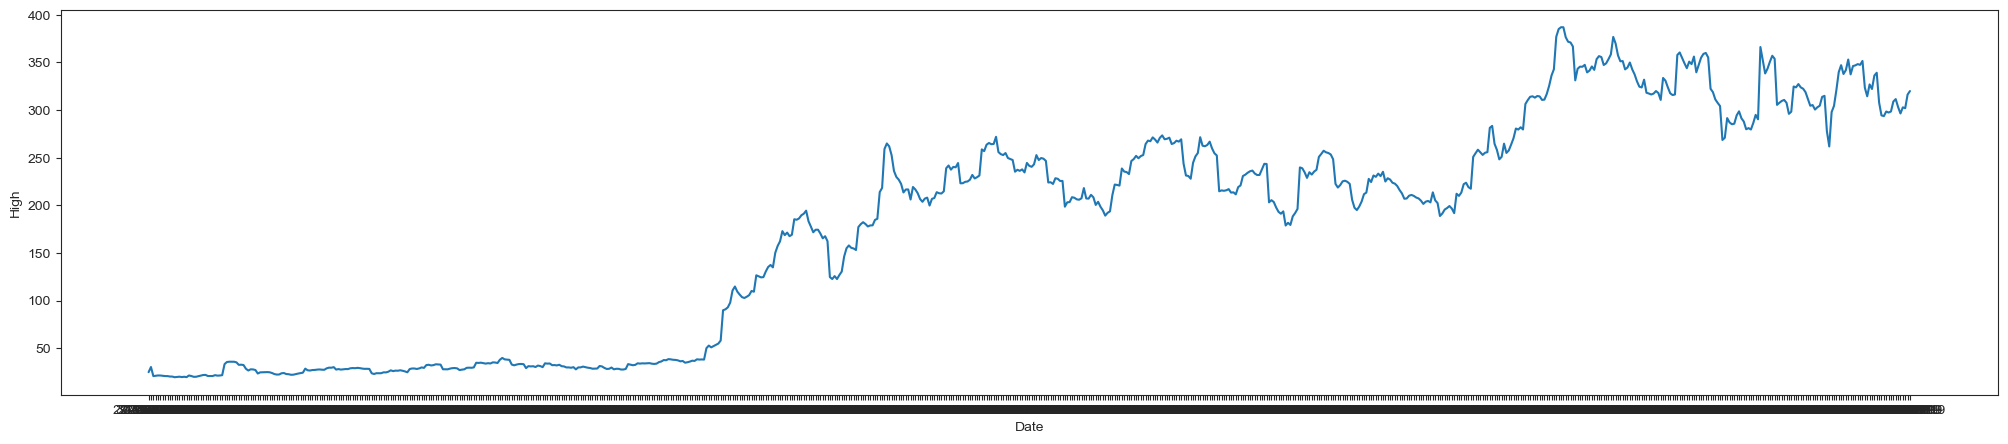

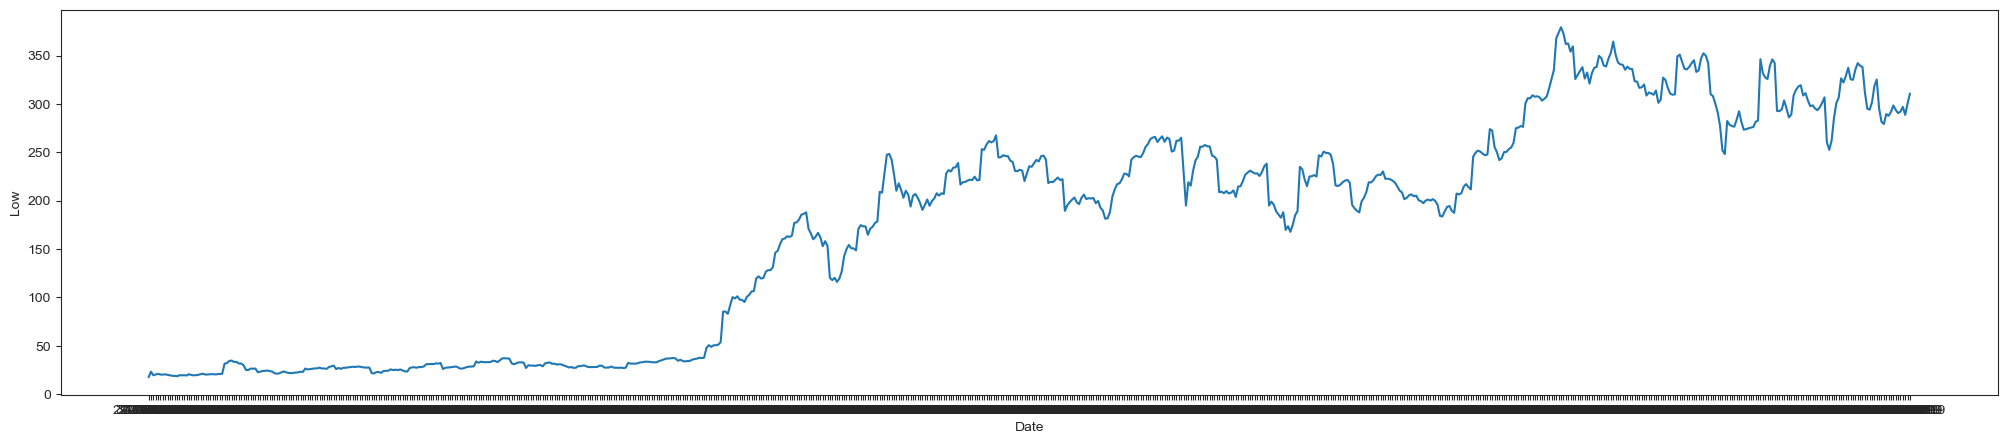

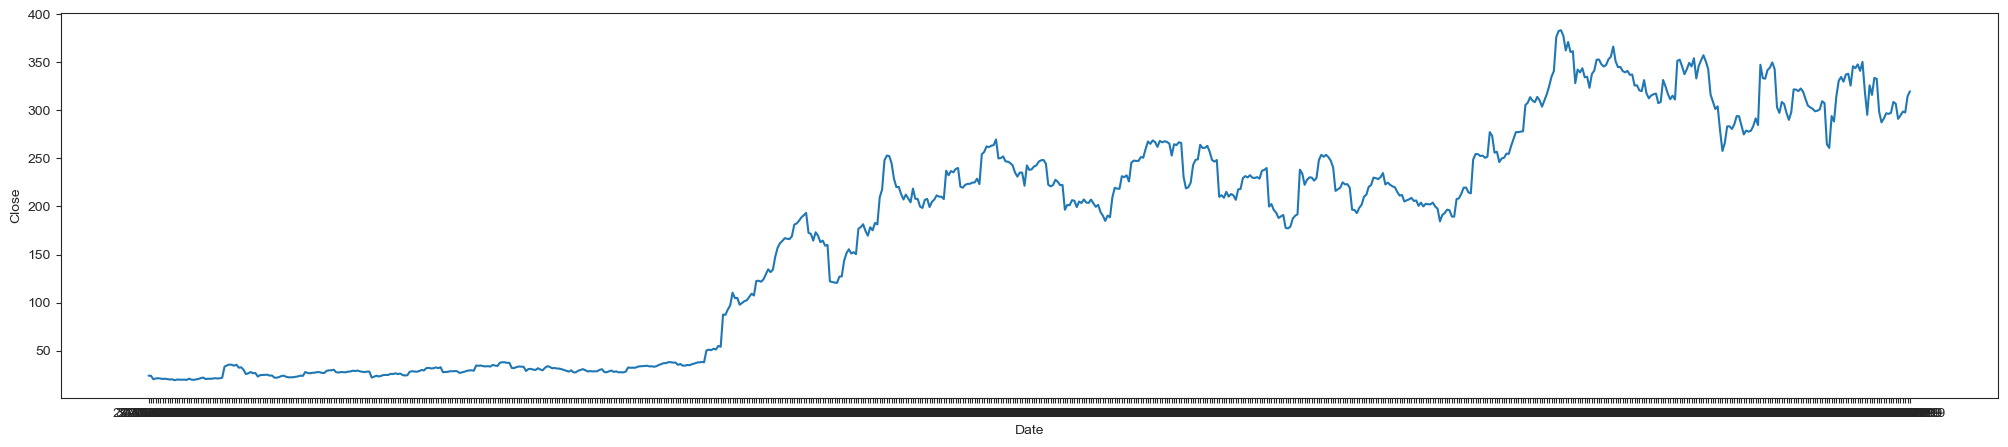

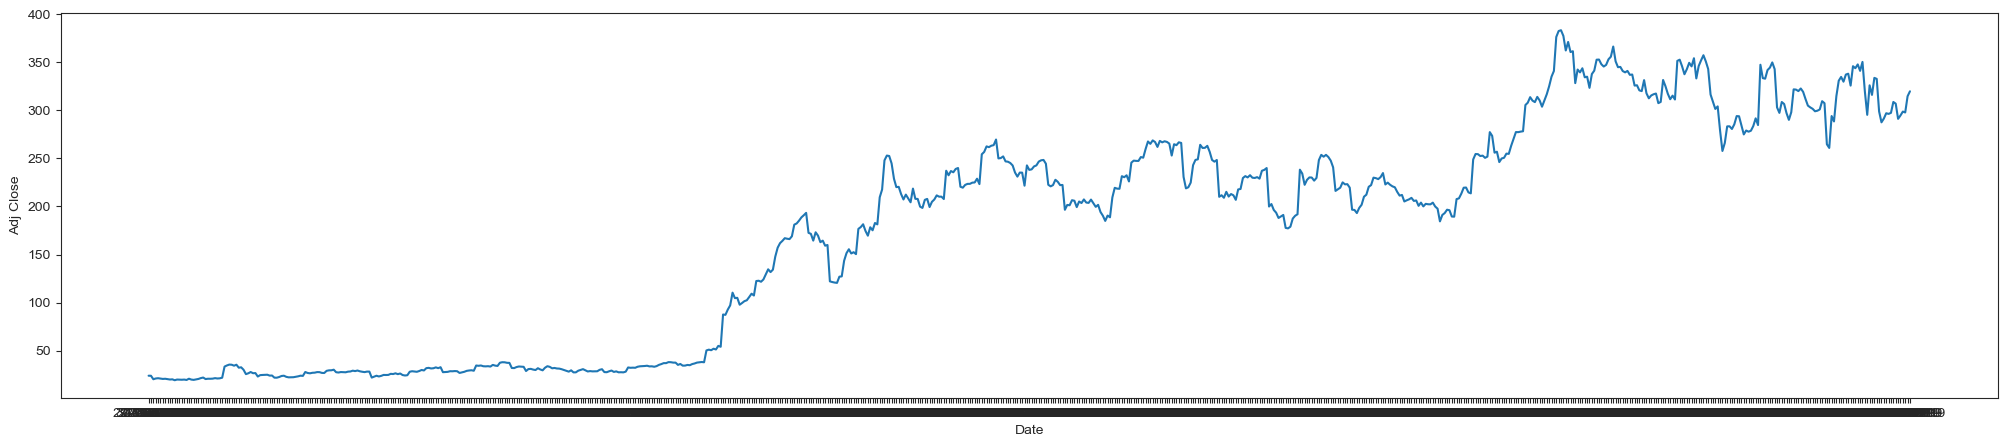

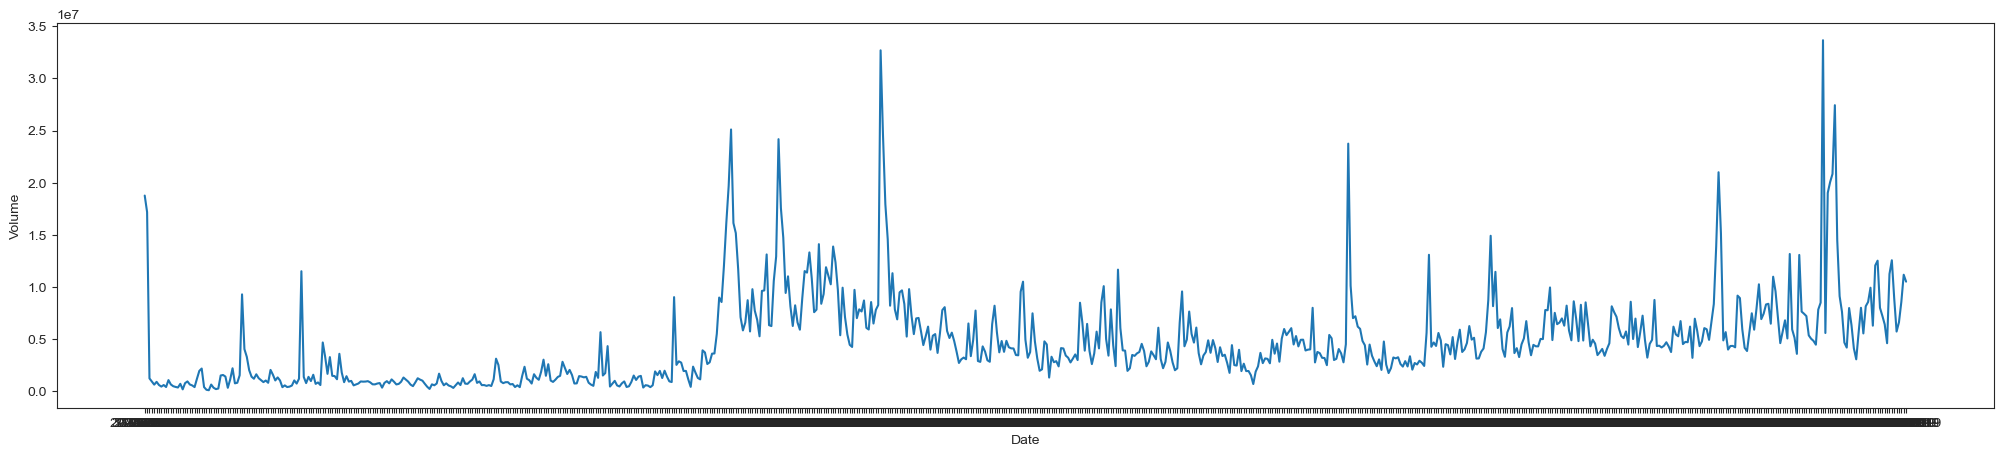

In [31]:
# drop data before the shift
drop_idx = df_copy[df_copy.Date < '2013-02'].index
df_copy = df_copy.drop(drop_idx)
# replot lines
plot_columns(df_copy)

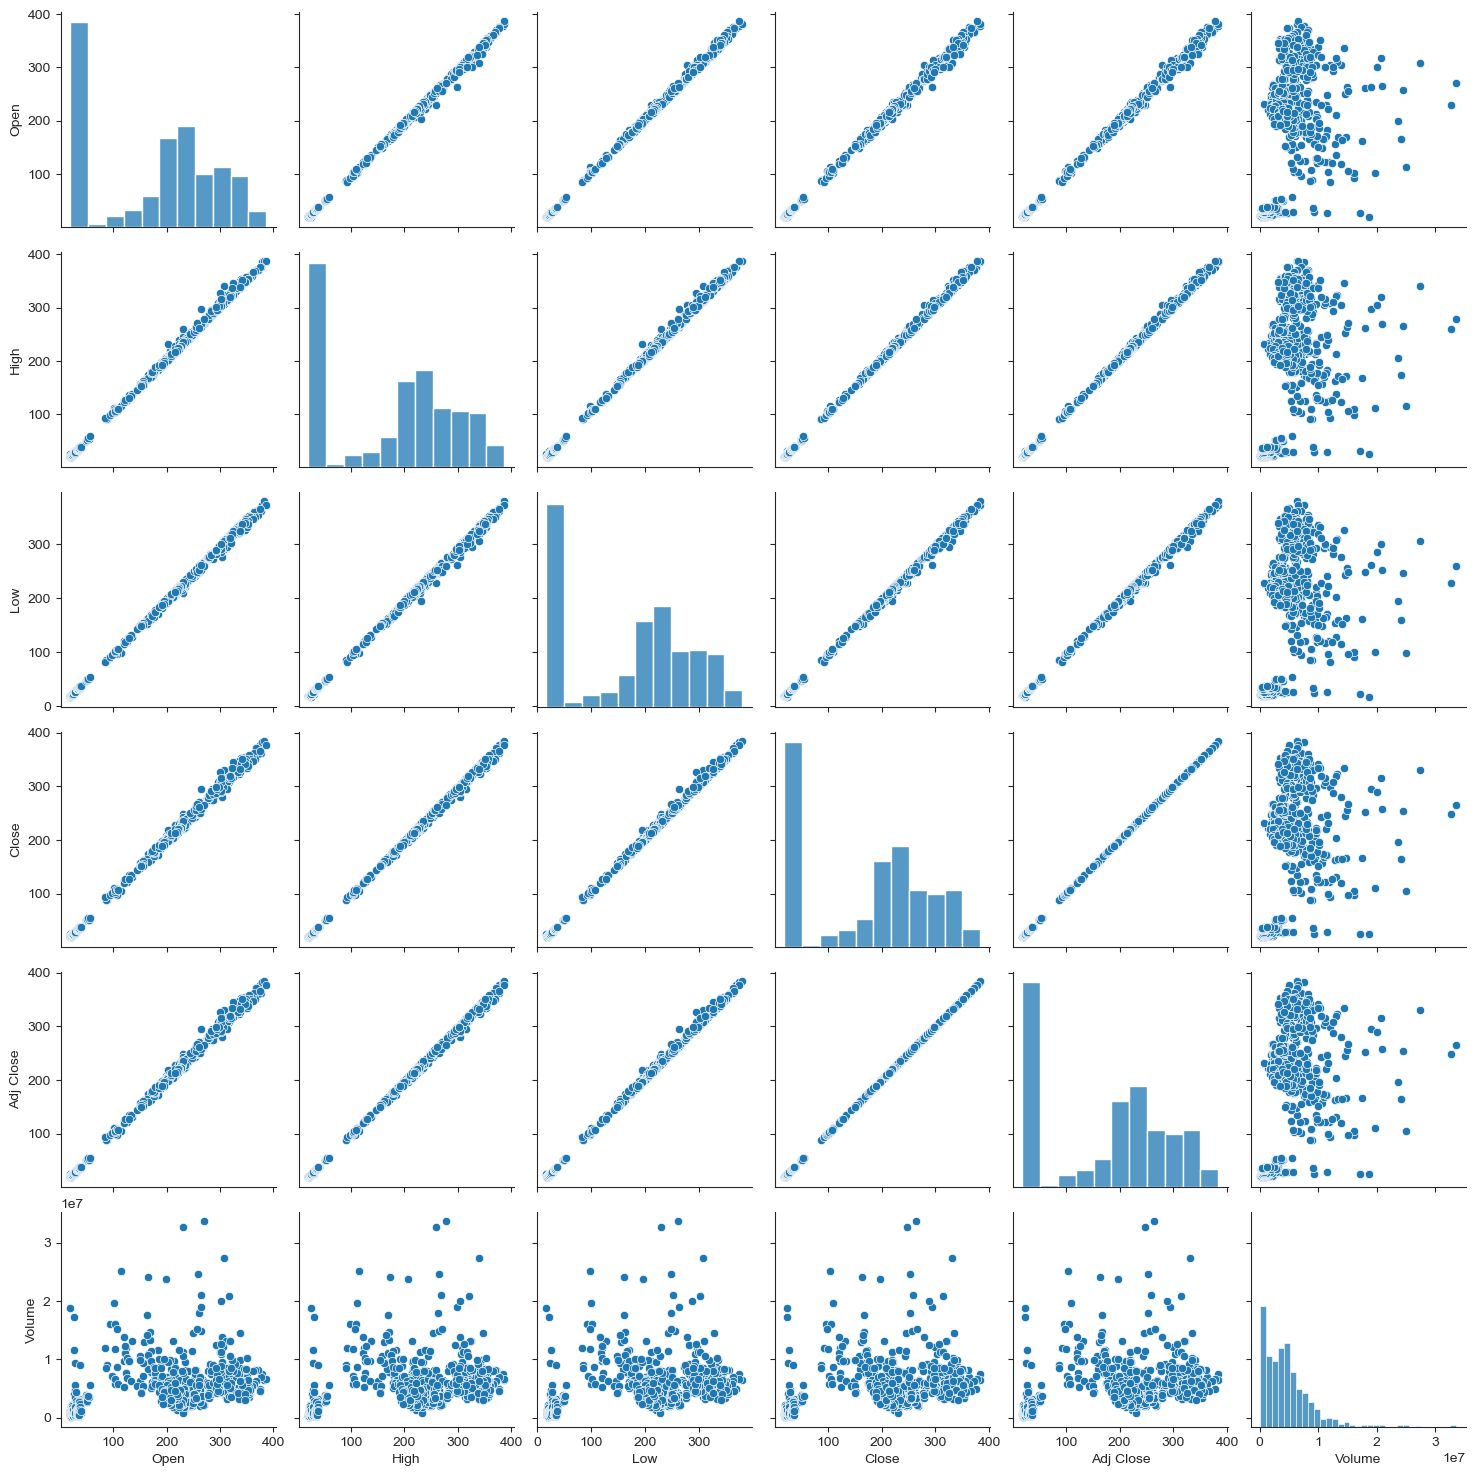

In [32]:
sns.pairplot(df_copy)
plt.show()

In [57]:
# Create a DataFrame with a datetime index and some random data

test = pd.to_datetime(df_copy['Date'], format='%d-%m-%Y')
test = test.to_frame()
# Shift the index by one
test['time_gap'] = test.Date - test.Date.shift(1)


# Print the resulting DataFrame
test

,Date,time_gap
0,2010-06-29,NaT
1,2010-06-30,1 days
15,2010-07-21,21 days
16,2010-07-22,1 days
17,2010-07-23,1 days
...,...,...
2177,2019-02-22,1 days
2178,2019-02-25,3 days
2179,2019-02-26,1 days
2180,2019-02-27,1 days
